# Loan Status Classification

## Importing Required Libraries

In [1]:
import pandas as pd # for Data Frame
import numpy as np # for Numerical Operation
import matplotlib.pyplot as plt # for Visulization
%matplotlib inline
import seaborn as sns # for Visulization
import warnings # for Ignoring Warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB # Naive Bayes Algoritham
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score # for Accuracy
from sklearn.metrics import classification_report # for Accuracy
from sklearn.model_selection import train_test_split # for Split Data into Train and Test
from sklearn.preprocessing import LabelEncoder

## Part - 1 : Data Exploration and Pre-processing

### 1) Load the given dataset

In [2]:
df = pd.read_csv('Project_8_Loan_Status_Classification.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


### 2) Check the null values

In [4]:
df.isnull().sum()

ID                   0
LIMIT_BAL            0
AGE                  0
BILL_AMT1         2008
BILL_AMT2         2506
BILL_AMT3         2870
BILL_AMT4         3195
BILL_AMT5         3506
BILL_AMT6         4020
PAY_AMT1          5249
PAY_AMT2          5396
PAY_AMT3          5968
PAY_AMT4          6408
PAY_AMT5          6703
PAY_AMT6          7173
Default Status       0
dtype: int64

### 3) Print all the column names

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Status'],
      dtype='object')

### 4) Create list for all the columns which have null values columns

In [7]:
lis = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

### 5) Fill all the null values with mean using loop

In [8]:
for i in lis:
    df[i] = df[i].fillna(df[i].mean())

### 6) Get the data information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       30000 non-null  float64
 4   BILL_AMT2       30000 non-null  float64
 5   BILL_AMT3       30000 non-null  float64
 6   BILL_AMT4       30000 non-null  float64
 7   BILL_AMT5       30000 non-null  float64
 8   BILL_AMT6       30000 non-null  float64
 9   PAY_AMT1        30000 non-null  float64
 10  PAY_AMT2        30000 non-null  float64
 11  PAY_AMT3        30000 non-null  float64
 12  PAY_AMT4        30000 non-null  float64
 13  PAY_AMT5        30000 non-null  float64
 14  PAY_AMT6        30000 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


### 7) describe dataset

In [10]:
df.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,10666.660700,14.648867,32.427900,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
std,9698.091793,189.496507,12.718991,59472.881131,58305.224138,55777.906879,51825.29715,48612.594594,48042.412239,11398.052166,1.675277e+04,10956.873040,9805.177073,9756.444917,11652.208534
min,1.000000,1.000000,3.000000,-154973.000000,-69777.000000,-157264.000000,-81334.00000,-81334.000000,-94625.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,1850.500000,4.000000,26.000000,1788.000000,1847.750000,1862.000000,1782.00000,1718.000000,1724.000000,21.000000,1.900000e+01,15.000000,13.000000,13.000000,15.000000
50%,7483.500000,9.000000,33.000000,11569.000000,12637.000000,13255.000000,13350.00000,12847.000000,13398.500000,512.000000,5.150000e+02,431.000000,367.000000,387.000000,478.000000
75%,18746.250000,21.000000,41.000000,33989.494570,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
max,29999.000000,32768.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.00000,927171.000000,961664.000000,873552.000000,1.684259e+06,417588.000000,528897.000000,426529.000000,528666.000000


### 8) Display box plot for LIMIT_BAL

{'whiskers': [<matplotlib.lines.Line2D at 0x1d9ea156130>,
 'caps': [<matplotlib.lines.Line2D at 0x1d9ea156880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d9ea154ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d9ea156ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d9eab98310>],
 'means': []}

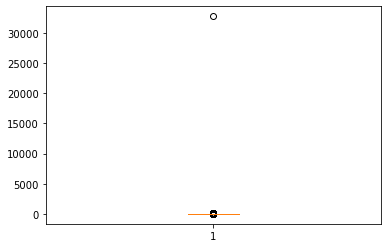

In [11]:
plt.boxplot(df.LIMIT_BAL)

### 9) Display box plot for age

{'whiskers': [<matplotlib.lines.Line2D at 0x1d9ea9bf250>,
 'caps': [<matplotlib.lines.Line2D at 0x1d9ea662580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d9ea9bfca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d9ea662b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d9ea668520>],
 'means': []}

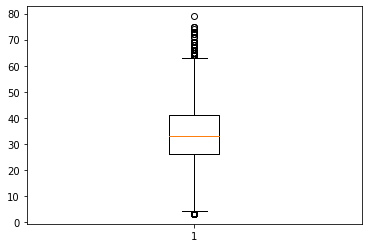

In [12]:
plt.boxplot(df.AGE)

### 10) Drop all the null values

In [13]:
df.isnull().sum()

ID                0
LIMIT_BAL         0
AGE               0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
Default Status    0
dtype: int64

#### There are no null values in dataset

### 11) Perform encoding on default status

In [14]:
encod = LabelEncoder()

In [15]:
df['Default Status'] = encod.fit_transform(df['Default Status'])

In [17]:
df[['Default Status']]

,Default Status
0,0
1,0
2,1
3,1
4,1
...,...
29995,1
29996,1
29997,0
29998,0


## Part - 2 : Working with Model

### 1) Create a feature and target dataset

In [18]:
x = df.drop(['Default Status'], axis=1)
y = df[['Default Status']]

In [19]:
x.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.0,2584.508988,2250.186122,2300.375885,2608.76576
1,2,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.0,1.000000,1.000000,2300.375885,2.00000
2,3,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.0,1.000000,1.000000,1.000000,5.00000
3,4,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.0,12.000000,11.000000,169.000000,1.00000
4,5,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.0,1.000000,9.000000,689.000000,679.00000


In [20]:
y.head()

,Default Status
0,0
1,0
2,1
3,1
4,1


### 2) Split data into training and testing

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [71]:
x_train.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
12086,1287,5.0,42,49887.0,49515.000000,3868.000000,29664.0,2957.0,2983.000000,185.000000,157.000000,11.0,12.000000,1116.000000,29.00000
26087,2688,5.0,37,38418.0,4779.000000,48923.000000,3921.0,3515.0,27861.000000,1.000000,2131.000000,191.0,141.000000,1159.000000,15.00000
27778,27779,5.0,24,25562.0,33879.000000,33441.000000,32697.0,33693.0,3329.000000,1.000000,2.000000,15.0,3.000000,15.000000,9.00000
10933,1934,33.0,24,341499.0,334929.000000,317997.000000,274132.0,267622.0,261246.000000,125.000000,1882.000000,992.0,1.000000,1.000000,17629.00000
4123,4124,12.0,4,739.0,33938.750418,32617.867011,3663.0,3663.0,28526.276559,2613.957537,2922.761583,3663.0,2250.186122,2300.375885,2608.76576


In [72]:
x_train.shape

(24000, 15)

In [73]:
x_test.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1301,132,1.0,22,112.0,9784.000000,9473.000000,8947.00000,9135.000000,8613.000000,2452.000000,7.000000,38.000000,32.000000,328.000000,1.00000
26985,26986,36.0,32,25.0,33938.750418,32617.867011,30709.50416,29015.123424,28526.276559,2613.957537,2922.761583,2584.508988,2250.186122,2300.375885,2608.76576
7182,7183,6.0,3,6558.0,59361.000000,6167.000000,5878.00000,59198.000000,6677.000000,35.000000,3.000000,1.000000,2.000000,2.000000,1.00000
1906,197,36.0,42,22237.0,5683.000000,1632.000000,1632.00000,22379.000000,891.000000,6695.000000,1632.000000,1632.000000,22379.000000,891.000000,4852.00000
27856,27857,7.0,22,66748.0,52642.000000,4934.000000,34685.00000,3166.000000,29299.000000,249.000000,17.000000,1446.000000,1.000000,144.000000,1176.00000


In [74]:
x_test.shape

(6000, 15)

In [75]:
y_train.shape

(24000, 1)

In [76]:
y_test.shape

(6000, 1)

### 3) Fit the Gaussian naive bayes classifier

In [95]:
gaussian = GaussianNB()

In [96]:
gaussian.fit(x_train, y_train)

GaussianNB()

In [97]:
y_pred = gaussian.predict(x_test)

### 4) Print the training score

In [98]:
train_score = round(gaussian.score(x_train, y_train)*100, 2)

In [99]:
print('Training Score: ', train_score)

Training Score:  75.62


### 5) Print the testing score

In [100]:
test_score = round(gaussian.score(x_test, y_test)*100, 2)

In [101]:
print('Test Score: ', test_score)

Test Score:  77.0


### 6) Find the accuracy score 

In [102]:
accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

In [103]:
print('Accuracy Score: ', accuracy)

Accuracy Score:  77.0


### 7) Find the precision score

In [104]:
precision = round(precision_score(y_test, y_pred)*100, 2)

In [105]:
print('Precision Score: ', precision)

Precision Score:  78.54


### 8) Find the recall score

In [106]:
recall = round(recall_score(y_test, y_pred)*100, 2)

In [107]:
print('Recall Score: ', recall)

Recall Score:  97.35


### 9) Find the Confusion matrix

In [108]:
con_mat = confusion_matrix(y_test, y_pred)

In [109]:
print('Confusion Matrix: \n', con_mat)

Confusion Matrix: 
 [[  27 1255]
 [ 125 4593]]


### 10) Find the classification report

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.18      0.02      0.04      1282
           1       0.79      0.97      0.87      4718

    accuracy                           0.77      6000
   macro avg       0.48      0.50      0.45      6000
weighted avg       0.66      0.77      0.69      6000



### Scaling data to increase accuracy

In [126]:
from sklearn.preprocessing import RobustScaler

In [127]:
scaler = RobustScaler()

In [128]:
columns = x.columns
columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [129]:
x_scale = scaler.fit_transform(x)

In [130]:
x_scale

array([[-0.44286285, -0.41176471, -0.6       , ...,  0.84176551,
         0.83649386,  0.82149506],
       [-0.44280366,  0.17647059, -0.46666667, ..., -0.16359837,
         0.83649386, -0.18351696],
       [-0.44274448,  0.        ,  0.06666667, ..., -0.16359837,
        -0.16875233, -0.18236034],
       ...,
       [ 1.33255404, -0.35294118,  0.26666667, ..., -0.14527178,
        -0.16831514, -0.1723363 ],
       [ 1.33261323, -0.05882353,  0.53333333, ...,  0.69685753,
        22.98572803, -0.11334871],
       [-0.44274448, -0.23529412,  0.86666667, ..., -0.16359837,
        -0.16875233, -0.1839025 ]])

In [131]:
x_scale = pd.DataFrame(x_scale, columns=columns)

In [132]:
x_scale

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-0.442863,-0.411765,-0.600000,-0.237753,-0.384064,-0.408572,0.600104,0.592301,0.564421,0.810641,0.059922,0.838101,0.841766,0.836494,0.821495
1,-0.442804,0.176471,-0.466667,-0.275981,-0.340033,-0.343772,-0.348388,-0.344066,-0.378233,0.810641,-0.177012,-0.167347,-0.163598,0.836494,-0.183517
2,-0.442744,0.000000,0.066667,0.548732,-0.349319,0.009884,0.033912,0.076968,0.080236,0.387974,-0.172190,-0.167347,-0.163598,-0.168752,-0.182360
3,-0.442685,-0.235294,0.266667,-0.213344,1.109221,1.171679,0.517293,0.590245,0.602505,-0.196687,-0.101937,-0.163066,-0.159128,-0.095306,-0.183902
4,-0.442626,-0.235294,1.600000,-0.091673,-0.376118,0.734169,-0.451335,0.230757,0.213881,-0.196687,12.454879,-0.167347,-0.160022,0.132029,0.077494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.332436,0.764706,0.400000,5.508409,5.614596,0.491288,-0.430939,0.673697,-0.440280,-0.164677,-0.176667,-0.147110,-0.008940,-0.167004,-0.183902
29996,1.332495,0.352941,0.666667,-0.307004,-0.336823,-0.419530,-0.151102,-0.451623,0.564421,0.510999,1.036931,3.334100,-0.106384,0.836494,0.821495
29997,1.332554,-0.352941,0.266667,-0.248560,-0.289209,-0.341301,-0.362008,-0.376047,0.222313,0.810641,0.829187,-0.159174,-0.145272,-0.168315,-0.172336
29998,1.332613,-0.058824,0.533333,-0.410354,2.048612,-0.182762,1.362855,-0.036341,1.326212,0.133824,-0.057167,0.290717,0.696858,22.985728,-0.113349


In [134]:
x_scale.shape

(30000, 15)

### Split Data into training and testing

In [170]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=30)

In [171]:
x_train.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
12207,-0.370241,0.588235,0.600000,-0.117790,-0.382070,-0.186566,-0.386553,-0.290470,-0.497924,-0.052450,2.413421,0.676005,-0.140355,-0.167878,0.821495
11452,0.234941,-0.235294,0.400000,-0.189463,1.121311,1.194309,0.218235,0.143678,-0.438153,0.810641,-0.168402,-0.142440,0.172091,0.091371,0.038554
10404,-0.434340,0.705882,-2.000000,1.069174,-0.246798,-0.235922,1.332089,-0.253543,-0.296784,-0.114541,-0.175634,-0.159174,0.841766,-0.149516,-0.183517
29997,1.332554,-0.352941,0.266667,-0.248560,-0.289209,-0.341301,-0.362008,-0.376047,0.222313,0.810641,0.829187,-0.159174,-0.145272,-0.168315,-0.172336
9753,0.134383,-0.058824,-2.000000,1.800041,1.828457,-0.192744,2.104053,2.308595,2.389704,-0.183960,-0.165303,-0.166569,-0.162704,-0.167878,-0.183131


In [172]:
x_train.shape

(24000, 15)

In [173]:
x_test.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
7707,-0.396875,-0.411765,0.266667,0.175302,-0.093609,-0.367767,-0.422504,-0.429935,-0.210560,0.669506,-0.172190,0.126872,0.841766,-0.150391,-0.183902
17433,0.588935,0.705882,0.800000,0.696256,0.663792,0.629567,0.600104,0.592301,0.564421,0.810641,0.829187,0.838101,0.841766,0.836494,0.821495
15668,0.484471,1.882353,-0.400000,-0.136019,0.093765,0.078782,-0.305522,0.184525,0.778012,-0.132281,0.399826,-0.003113,7.870154,14.921465,-0.042024
21926,0.854860,0.705882,-0.266667,-0.306725,-0.393880,-0.431072,-0.461602,-0.468254,-0.492999,0.810641,0.829187,0.838101,0.127839,0.643532,0.359709
28353,1.235251,0.470588,0.400000,-0.156980,0.656695,-0.360549,-0.380710,0.083818,-0.368308,-0.000386,-0.175634,2.376719,1.698562,1.372752,2.715357


In [174]:
x_test.shape

(6000, 15)

In [175]:
y_train.shape

(24000, 1)

In [176]:
y_test.shape

(6000, 1)

### Fit the Gaussian naive bayes classifier

In [177]:
gaussian = GaussianNB()

In [178]:
gaussian.fit(x_train, y_train)

GaussianNB()

In [179]:
y_pred = gaussian.predict(x_test)

### Print the Training Score

In [180]:
train_score = round(gaussian.score(x_train, y_train)*100, 2)

In [181]:
print('Training Score: ', train_score)

Training Score:  75.58


### Print the Testing Score

In [182]:
test_score = round(gaussian.score(x_test, y_test)*100, 2)

In [183]:
print('Testing Score: ', test_score)

Testing Score:  76.93


### Print the classification report

In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.02      0.04      1282
           1       0.79      0.97      0.87      4718

    accuracy                           0.77      6000
   macro avg       0.48      0.50      0.45      6000
weighted avg       0.65      0.77      0.69      6000

